<a href="https://colab.research.google.com/github/shristea31/Netflix-Stock-Predictor/blob/main/notebooks/Netflix_Stock_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Netflix Stock Predictor - Initial Setup

!pip install yfinance tensorflow scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
print("✅ Libraries loaded successfully!")


✅ Libraries loaded successfully!


DATA COLLECTION + EDA

In [3]:
df = yf.download('NFLX', start='2015-01-01')

/tmp/ipython-input-985428022.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('NFLX', start='2015-01-01')
[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,NFLX,NFLX,NFLX,NFLX,NFLX
Date,,,,,
2015-01-02,49.848572,50.331429,48.731430,49.151428,13475000
2015-01-05,47.311428,49.258572,47.147144,49.258572,18165000
2015-01-06,46.501431,47.639999,45.661430,47.347141,16037700
2015-01-07,46.742859,47.421429,46.271427,47.347141,9849700
2015-01-08,47.779999,47.835712,46.478573,47.119999,9601900


In [5]:
print("Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())


Shape: (2733, 5)

Data Types:
Price   Ticker
Close   NFLX      float64
High    NFLX      float64
Low     NFLX      float64
Open    NFLX      float64
Volume  NFLX        int64
dtype: object

Missing values:
Price   Ticker
Close   NFLX      0
High    NFLX      0
Low     NFLX      0
Open    NFLX      0
Volume  NFLX      0
dtype: int64


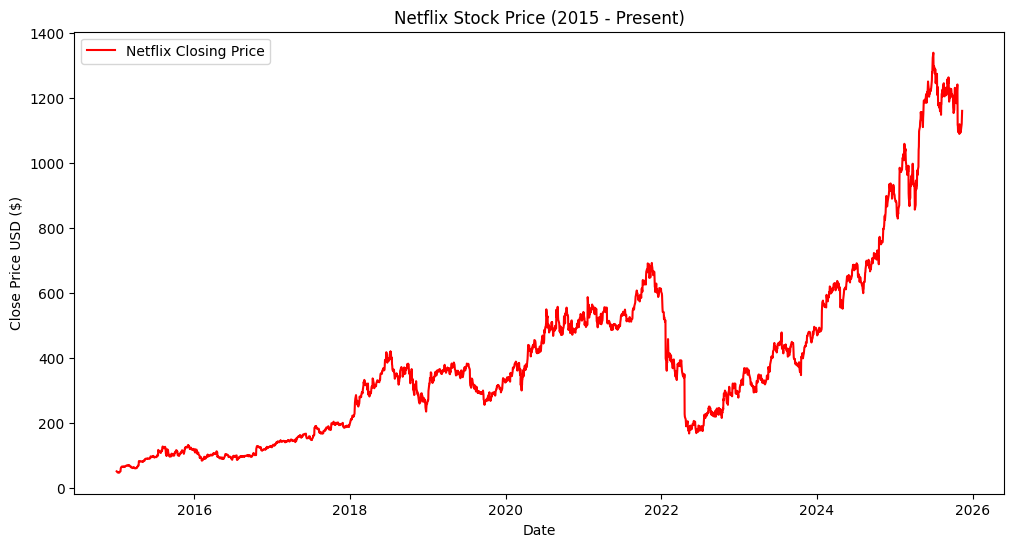

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Netflix Closing Price', color='red')
plt.title('Netflix Stock Price (2015 - Present)')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.show()


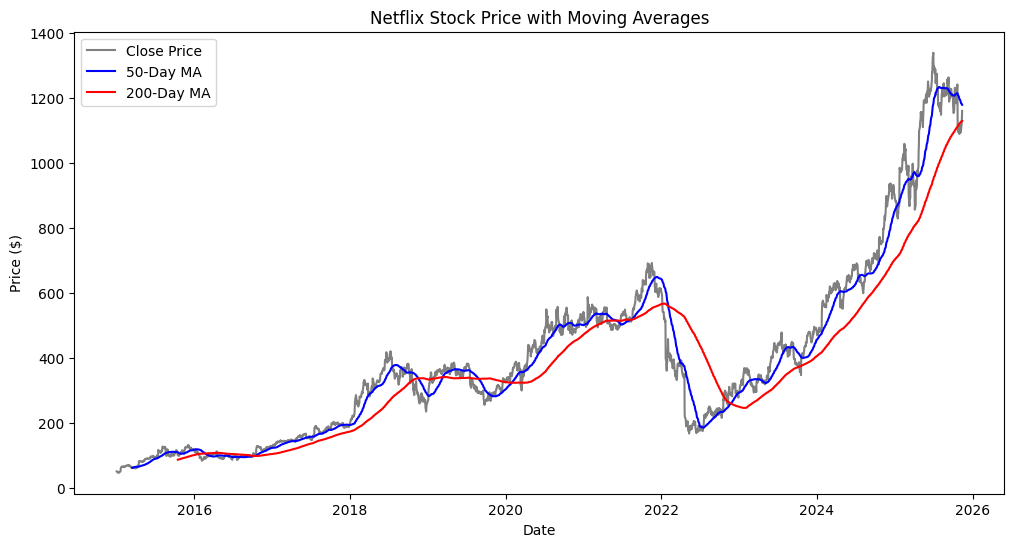

In [7]:
df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price', color='gray')
plt.plot(df['MA50'], label='50-Day MA', color='blue')
plt.plot(df['MA200'], label='200-Day MA', color='red')
plt.title('Netflix Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


In [8]:
df.to_csv('netflix_stock_data.csv')
print("Data saved to netflix_stock_data.csv")


Data saved to netflix_stock_data.csv


In [9]:
from google.colab import files
files.download('netflix_stock_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CHOOSING BASELINE ML MODEL


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [11]:
df = pd.read_csv('netflix_stock_data.csv', index_col=0)

In [12]:
df = df[['Close']]

In [13]:
df['Prev_Close'] = df['Close'].shift(1)
df.dropna(inplace=True)

X = df[['Prev_Close']]
y = df['Close']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

LINEAR REGRESSION

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression → MSE: {mse_lr:.4f}, MAE: {mae_lr:.4f}, R²: {r2_lr:.4f}")


Linear Regression → MSE: 286.9660, MAE: 11.3167, R²: 0.9963


RANDOM FOREST

In [15]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest → MSE: {mse_rf:.4f}, MAE: {mae_rf:.4f}, R²: {r2_rf:.4f}")


Random Forest → MSE: 83466.7482, MAE: 192.5181, R²: -0.0689


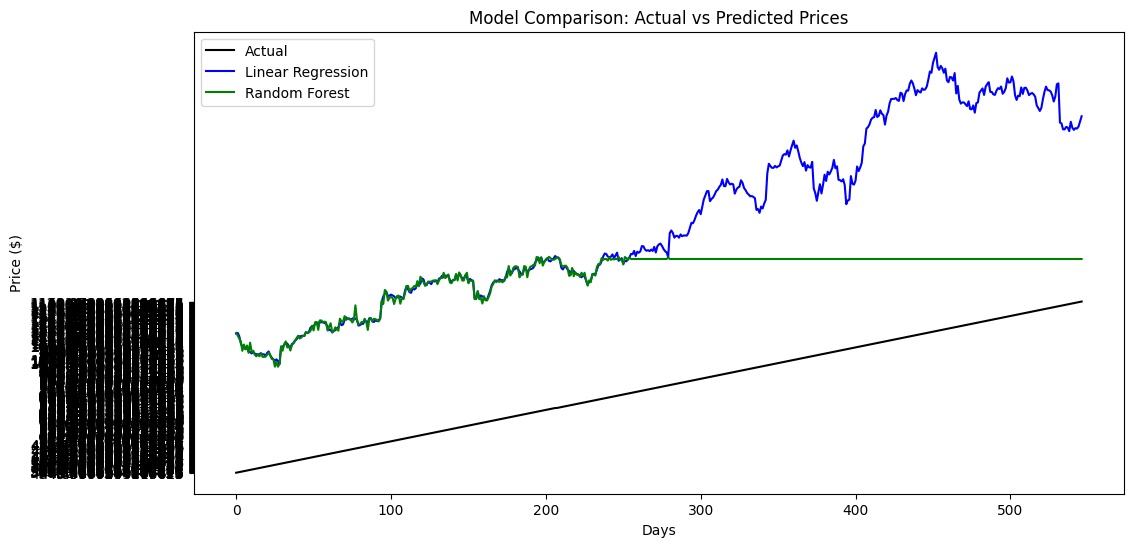

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual', color='black')
plt.plot(y_pred_lr, label='Linear Regression', color='blue')
plt.plot(y_pred_rf, label='Random Forest', color='green')
plt.title('Model Comparison: Actual vs Predicted Prices')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


In [18]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MSE': [mse_lr, mse_rf],
    'MAE': [mae_lr, mae_rf],
    'R2': [r2_lr, r2_rf]
})

import os

os.makedirs('results', exist_ok=True)

results.to_csv('results/ml_model_comparison.csv', index=False)
print("Results saved to results/ml_model_comparison.csv")


Results saved to results/ml_model_comparison.csv


In [19]:
from google.colab import files
files.download('results/ml_model_comparison.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DEEP LEARNING


In [20]:
import os

os.makedirs("data", exist_ok=True)
os.makedirs("notebooks", exist_ok=True)
os.makedirs("results", exist_ok=True)
